![](../header.jpg)
# Generating Tags

In [1]:
# reload library
%load_ext autoreload
%autoreload 2

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from moms_apriltag import TagGenerator2, TagGenerator3 
import cv2

# Multiple tags at once

In [18]:

identifiers.sort()
print(identifiers)

[3823, 3828, 3829, 3846, 3868, 3869, 3887, 3890, 3901, 3904, 3918, 3926, 3948, 3981, 3988, 4001, 4005, 4010, 4019, 4020, 4021, 4028, 4031, 4034, 4035, 4047, 4049, 4050, 4054, 4060, 4061, 4068, 4083, 4086, 4090, 4095, 4096, 4098, 4101, 4104, 4105, 4111, 4114, 4123, 4124, 4128, 4469, 4471, 4472]


In [19]:
import os

# Define the DPI and calculate the pixel dimensions
dpi = 300
inch_size = 2.7
pixel_size = int(dpi * inch_size)

# Assuming you have a list of identifiers for which you want to generate tags
identifiers = [
    3823, 3828, 3829, 3846, 3868, 3869, 3887,
    3890, 3901, 3904, 3918, 3926, 3948, 3981, 
    3988, 4001, 4005, 4010, 4019, 4020, 4021, 
    4028, 4031, 4034, 4035, 4047, 4049, 4050, 
    4054, 4060, 4061, 4068, 4083, 4086, 4090, 
    4095, 4096, 4098, 4101, 4104, 4105, 4111, 
    4114, 4123, 4124, 4128, 4469, 4471, 4472
] # Example identifiers, replace with your actual list
print(len(identifiers))
# Create the qr_tags directory if it doesn't exist
os.makedirs('qr_tags', exist_ok=True)

# Initialize your TagGenerator
tg = TagGenerator3("tagCustom48h12")

for identifier in identifiers:
    # Generate the tag image
    im = tg.generate(identifier)
    
    # Resize the image to the desired output size (if necessary)
    # This step depends on whether your tag generator already outputs at the desired resolution.
    # If resizing is needed, use appropriate image resizing methods from libraries such as PIL or OpenCV.
    
    # Save the image
    file_path = f'qr_tags/tag_{identifier}.png'
    plt.imsave(file_path, im, cmap="gray", dpi=dpi)

print(f"Generated and saved {len(identifiers)} tags in the 'qr_tags' folder.")


49
Generated and saved 49 tags in the 'qr_tags' folder.


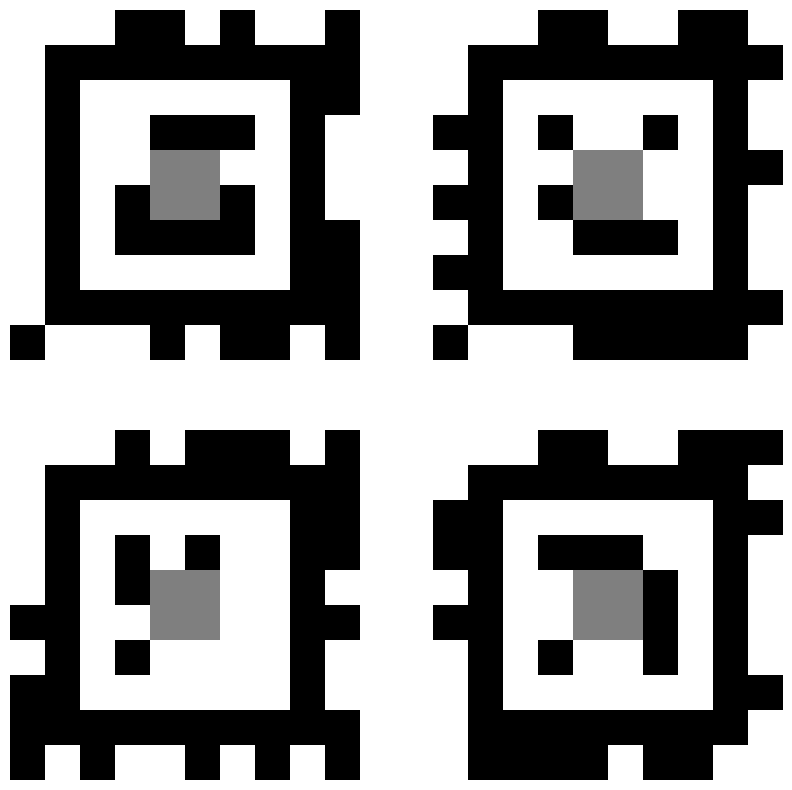

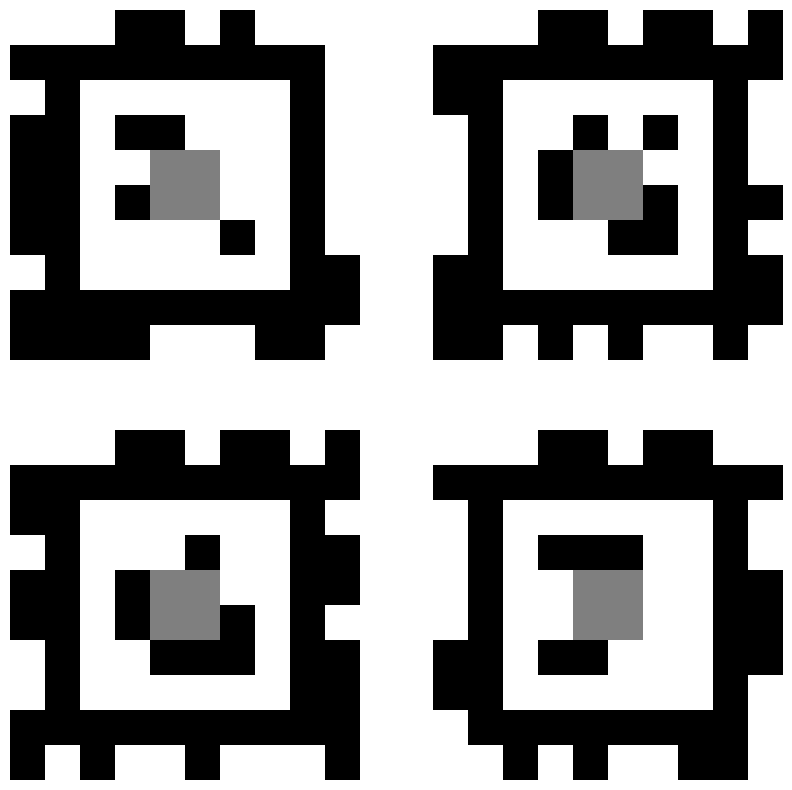

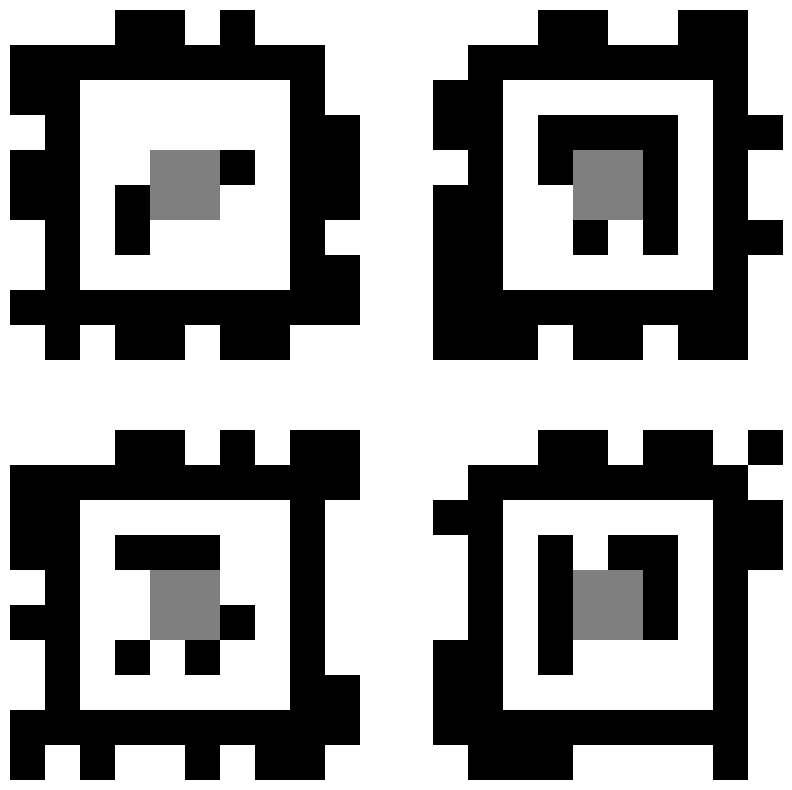

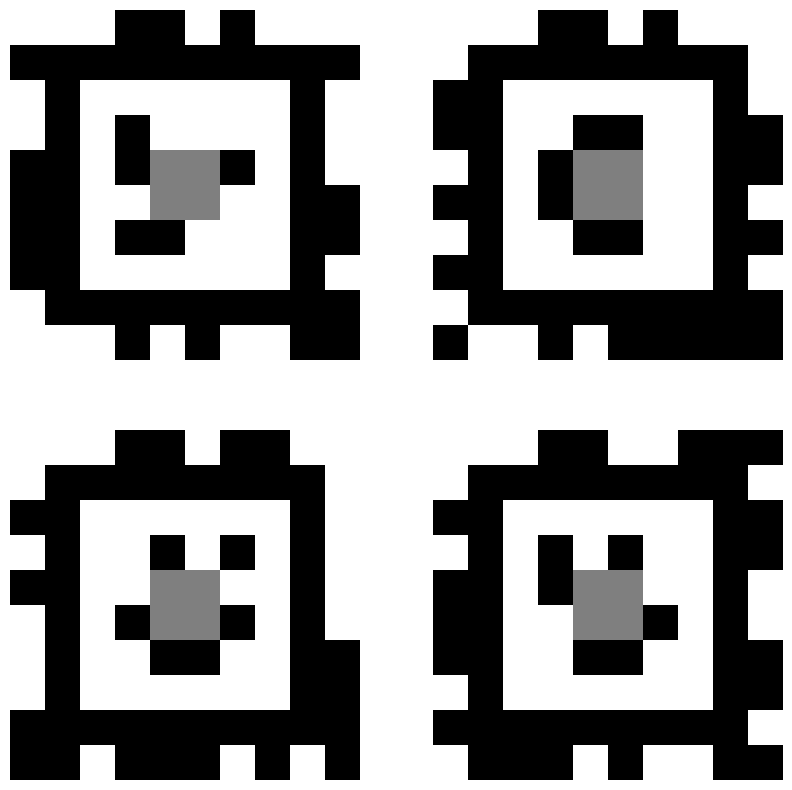

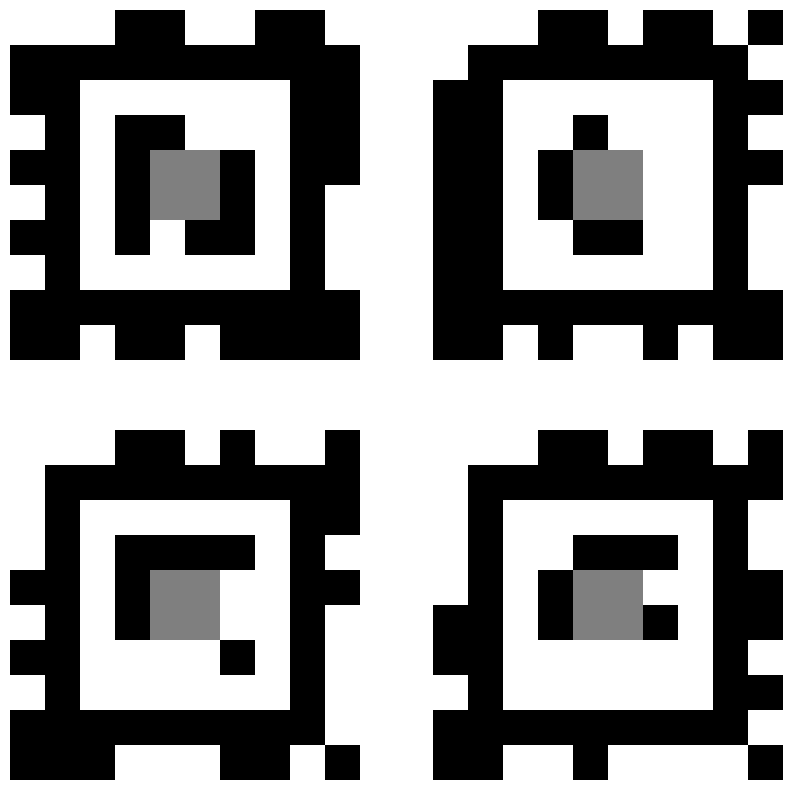

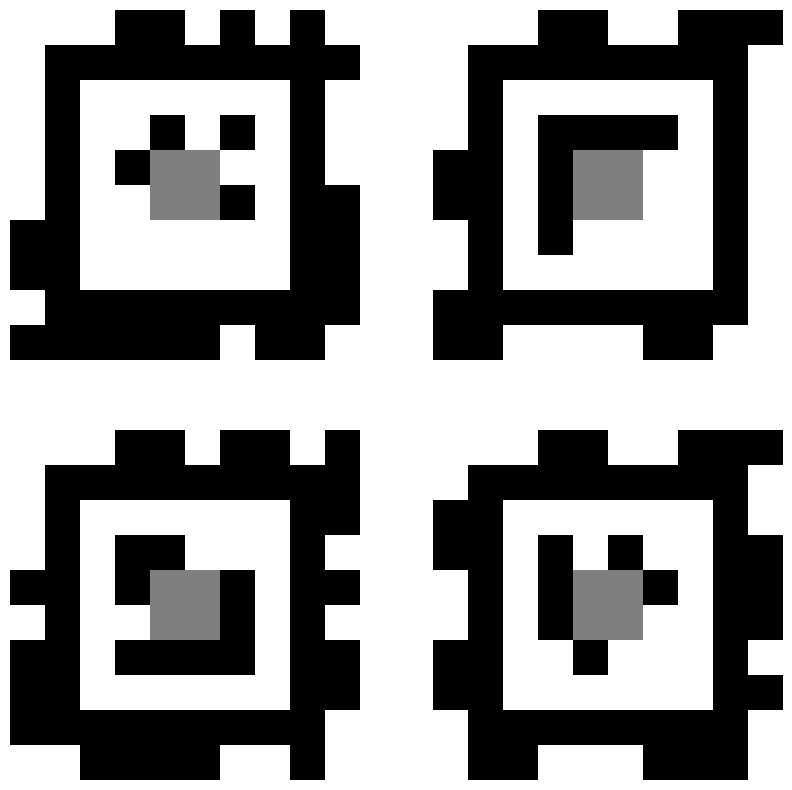

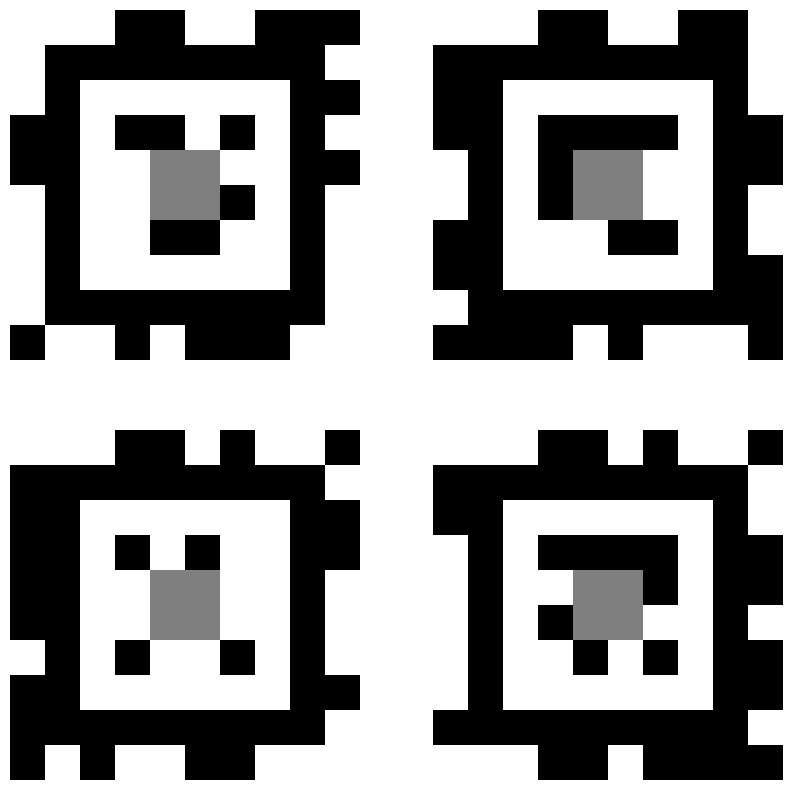

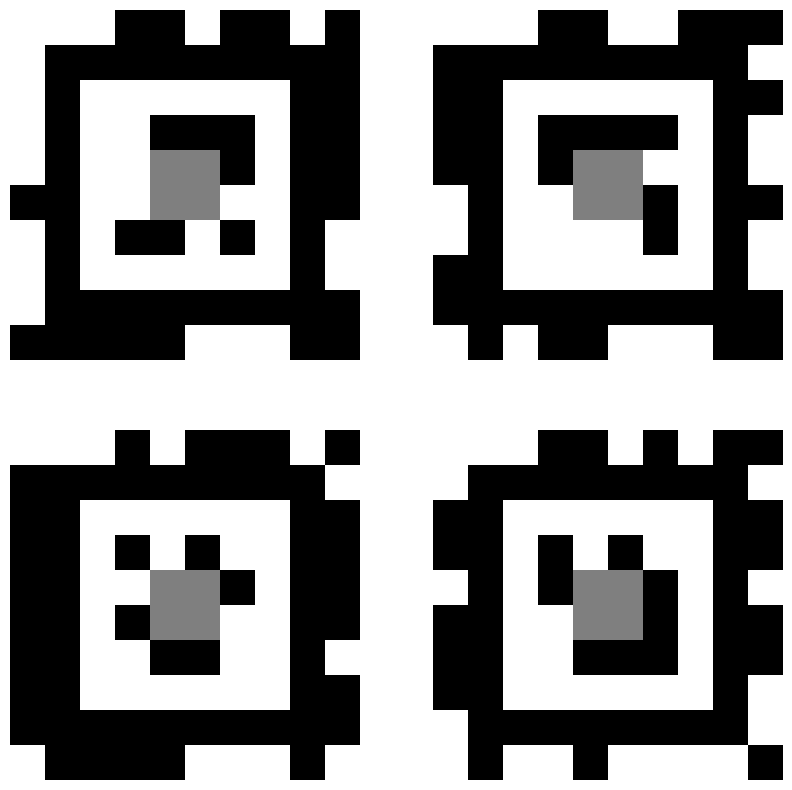

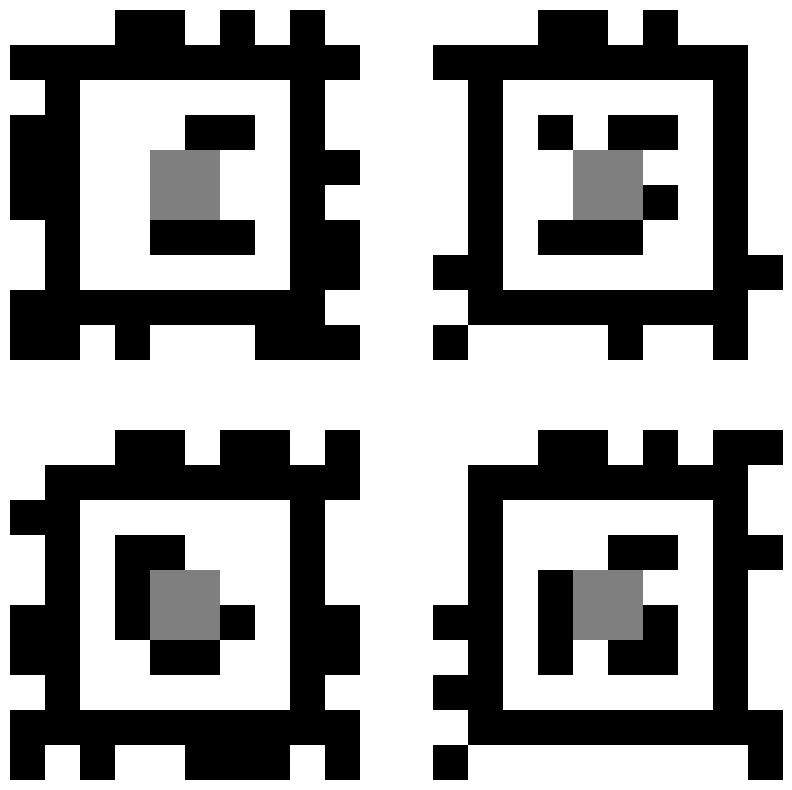

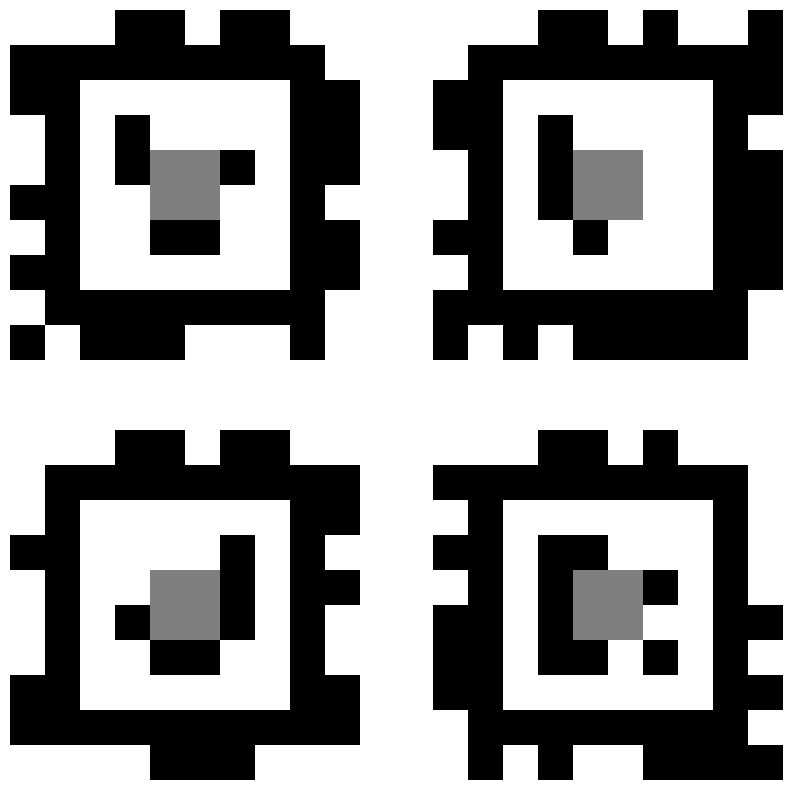

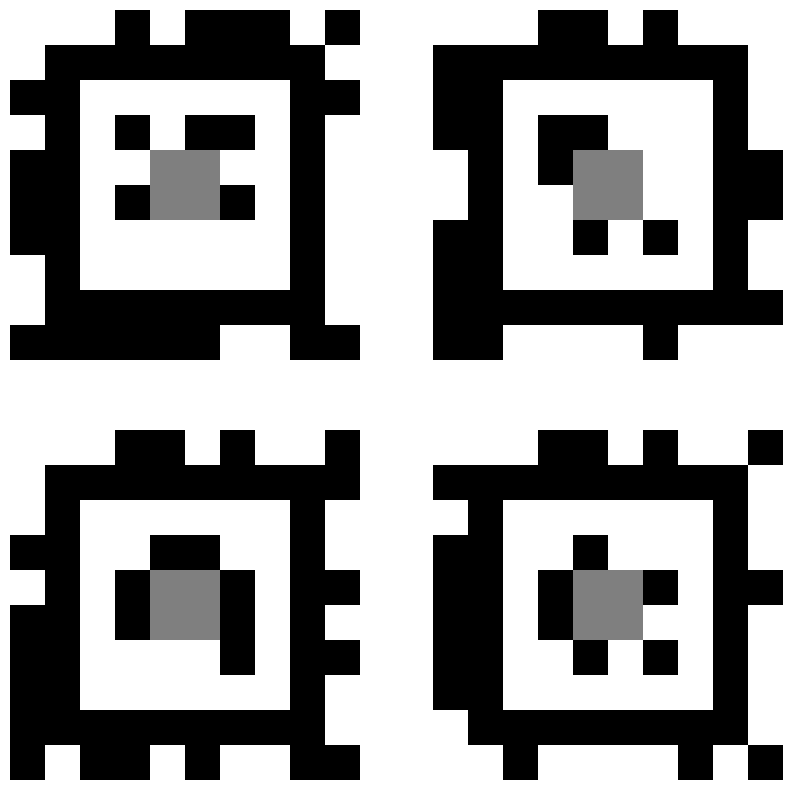

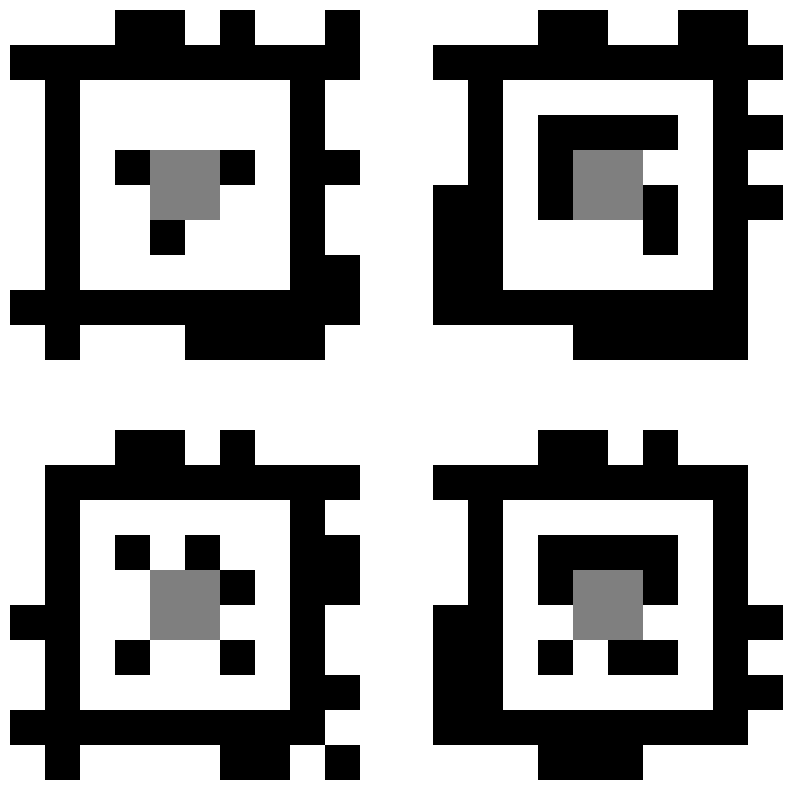

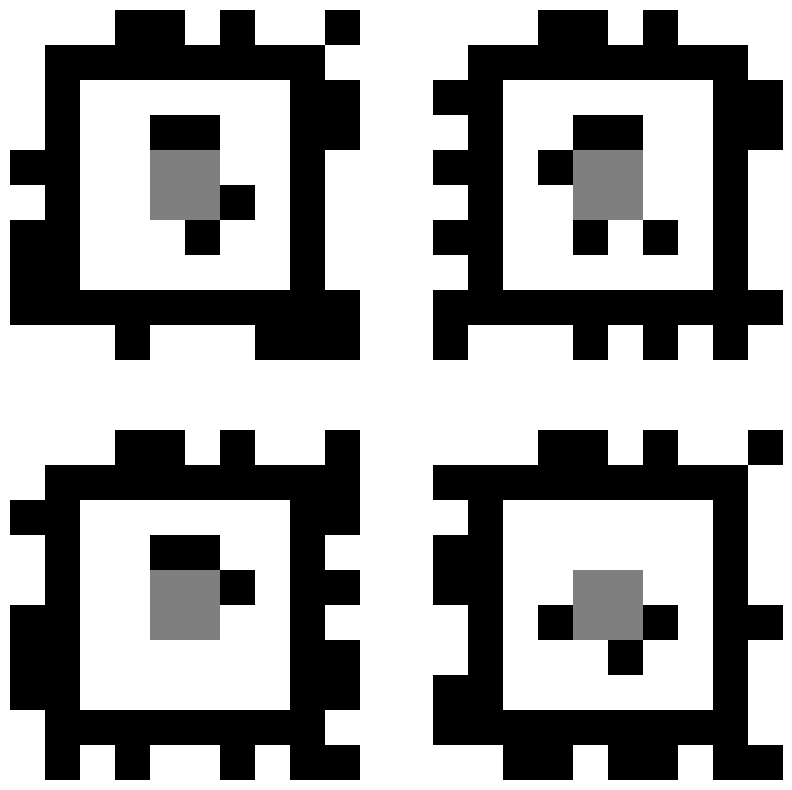

In [22]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def display_images_in_grid(folder_path, grid_size=(2, 2)):
    # List all images in the folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
    total_images = len(image_files)
    
    # Calculate the number of figures needed to display all images in 2x2 grids
    images_per_figure = grid_size[0] * grid_size[1]
    num_figures = (total_images + images_per_figure - 1) // images_per_figure
    
    current_image_index = 0
    
    for fig_index in range(num_figures):
        plt.figure(figsize=(10, 10))
        for _ in range(images_per_figure):
            if current_image_index >= total_images:
                break  # No more images to display
            
            # Load and display the current image
            img_path = os.path.join(folder_path, image_files[current_image_index])
            img = Image.open(img_path)
            plt.subplot(grid_size[0], grid_size[1], _ + 1)
            plt.imshow(img)
            plt.axis('off')
            
            current_image_index += 1
        
        plt.show()

# Example usage
folder_path = 'qr_tags'  # Update this path to your folder's path
display_images_in_grid(folder_path)


## Gen 3 Tags

Max tags: 42211


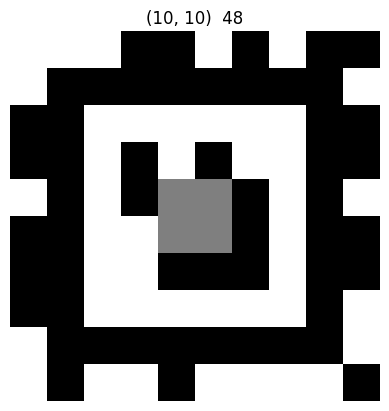

In [6]:
tg = TagGenerator3("tagCustom48h12")
im = tg.generate(3948)
print(f"Max tags: {len(tg.codes)}")
plt.imshow(im, cmap="gray")
plt.title(f"{im.shape}  {tg.template.numBits}")
plt.axis("off");

In [21]:
png = tg.toRGBA(im)
cv2.imwrite("circletag.png", png)

True

In [25]:
img =cv2.imread("circletag.png")
cv2.imshow("ims",img)
cv2.waitKey(0)

-1

Max tags: 65535


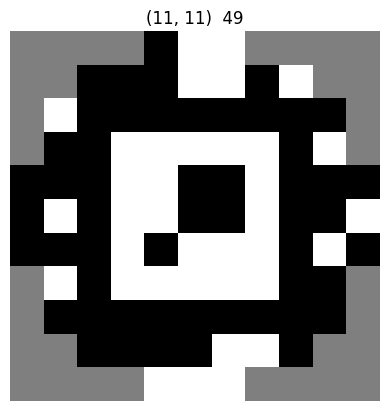

In [12]:
tg = TagGenerator3("tagCircle49h12")
im = tg.generate(0)
print(f"Max tags: {len(tg.codes)}")
plt.imshow(im, cmap="gray");
plt.title(f"{im.shape}  {tg.template.numBits}")
plt.axis("off");

In [13]:
png = tg.toRGBA(im)
cv2.imwrite("circletag.png", png)

True

Max tags: 38


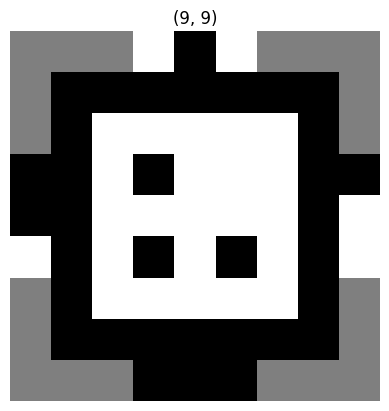

In [14]:
tg = TagGenerator3("tagCircle21h7")
im = tg.generate(0)
print(f"Max tags: {len(tg.codes)}")
plt.imshow(im, cmap="gray");
plt.title(im.shape)
plt.axis("off");

Max tags: 48714


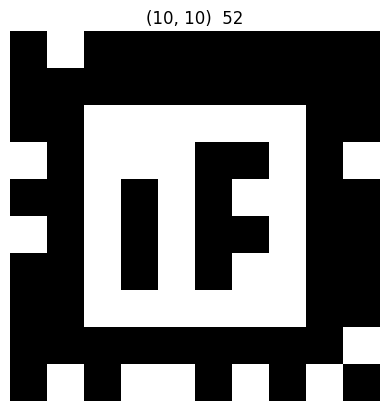

In [15]:
tg = TagGenerator3("tagStandard52h13")
im = tg.generate(129)
print(f"Max tags: {len(tg.codes)}")
plt.imshow(im, cmap="gray");
plt.title(f"{im.shape}  {tg.template.numBits}")
plt.axis("off");

Max tags: 2115


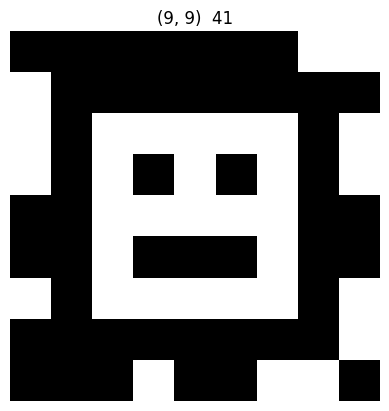

In [16]:
tg = TagGenerator3("tagStandard41h12")
im = tg.generate(137)
print(f"Max tags: {len(tg.codes)}")
plt.imshow(im, cmap="gray");
plt.title(f"{im.shape}  {tg.template.numBits}")
plt.axis("off");

In [11]:
imgs = []
tg = TagGenerator3("tagStandard41h12")

for tag_id in [0,1,2,3,4,5,100,113,137,141,146,283]:
    im = tg.generate(tag_id, 20)
    imgs.append(im)
    
im = mosaic(imgs)
plt.imshow(im, cmap="gray")
plt.axis("off");

NameError: name 'mosaic' is not defined

## Gen 2 Tags

In [18]:
from moms_apriltag.tags import tag36h10,tag36h11,tag16h5,tag25h9

print("Max tags:")
print("tag16h5", len(tag16h5.codes))
print("tag25h9", len(tag25h9.codes))
print("tag36h10", len(tag36h10.codes))
print("tag36h11", len(tag36h11.codes))